# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city.title())

# Print the city count to confirm sufficient count
cities = set(cities);
cities = list(cities);
print(cities)
print(len(cities))

['Attawapiskat', 'Kudahuvadhoo', 'Avarua', 'Tchollire', 'Marienburg', 'Gerede', 'Port Lincoln', 'Te Anau', 'Cumaribo', 'Nemuro', 'Anshun', 'Pedra Azul', 'Port Hardy', 'Zaria', 'Abu Samrah', 'Alofi', 'Aswan', 'Verkhnevilyuysk', 'Shellbrook', 'Dungarvan', 'Marzuq', 'Kumano', 'Sentyabrskiy', 'Killybegs', 'La Ronge', 'Akdagmadeni', 'Hami', 'Nioro', 'Hambantota', 'Deputatskiy', 'Christchurch', 'Aksha', 'Kaeo', 'Toyooka', 'Kozhva', 'Manoel Urbano', 'Leuna', 'Barentsburg', 'Buraydah', 'Lorengau', 'Tuy Hoa', 'Westport', 'Houma', 'Kapaa', 'Nerja', 'Ternate', 'Shache', 'Iquique', 'Illoqqortoormiut', 'North Vernon', 'Ushtobe', 'Sorland', 'Tumannyy', 'Khandyga', 'Whitehorse', 'Tuktoyaktuk', 'Boden', 'Chom Bung', 'Kavieng', 'Oron', 'Sambava', 'Aktash', 'Kashi', 'Palabuhanratu', 'Thompson', 'Candolim', 'Hamilton', 'Vizovice', 'Bengkulu', 'San Francisco', 'Sandwick', 'Saint-Augustin', 'Tasiilaq', 'Mlonggo', 'Brownsville', 'Cape Town', 'Dumai', 'Karratha', 'Voskresenskoye', 'Northam', 'Poputnaya', 'Vr

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [8]:
cities_df = pd.DataFrame({
    "City": cities,
    'Latitude': '',
    'Longitude': '',
    'Temperature': '',
    'Humidity': '',
    'Cloudiness': '',
    'Wind Speed': '',
})

print(cities_df.shape)
cities_df.head()


(596, 7)


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Attawapiskat,,,,,,
1,Kudahuvadhoo,,,,,,
2,Avarua,,,,,,
3,Tchollire,,,,,,
4,Marienburg,,,,,,


In [9]:
ow_query_url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid': weather_api_key,
    'units': 'Imperial'
}



for (idx, row) in cities_df.iterrows():
    city = row['City']
    params['q'] = city
    ow_city_response = requests.get(ow_query_url, params=params).json()
    try:
        # print(f'Requesting data from City {city} and number {idx}')
        cities_df.loc[idx, 'Latitude'] = ow_city_response['coord']['lat'];
        cities_df.loc[idx, 'Longitude'] = ow_city_response['coord']['lon'];
        cities_df.loc[idx, 'Temperature'] = ow_city_response['main']['temp'];
        cities_df.loc[idx, 'Humidity'] = ow_city_response['main']['humidity'];
        cities_df.loc[idx, 'Cloudiness'] = ow_city_response['clouds']['all'];
        cities_df.loc[idx, 'Wind Speed'] = ow_city_response['wind']['speed'];
    except:
        print(f'Requesting data from City {city} and number {idx} failed')
    # print('--------------------------------------------------------------')


Requesting data from City Attawapiskat and number 0 failed
Requesting data from City Cumaribo and number 8 failed
Requesting data from City Sentyabrskiy and number 22 failed
Requesting data from City Barentsburg and number 37 failed
Requesting data from City Illoqqortoormiut and number 48 failed
Requesting data from City Tumannyy and number 52 failed
Requesting data from City Chom Bung and number 57 failed
Requesting data from City Palabuhanratu and number 63 failed
Requesting data from City Ngukurr and number 82 failed
Requesting data from City Sataua and number 83 failed
Requesting data from City Bokspits and number 100 failed
Requesting data from City Mahadday Weyne and number 116 failed
Requesting data from City Belushya Guba and number 122 failed
Requesting data from City Mrirt and number 126 failed
Requesting data from City Dinsor and number 128 failed
Requesting data from City Burica and number 148 failed
Requesting data from City Barbar and number 153 failed
Requesting data fro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
cities_df = cities_df[cities_df['Latitude'] != '']
cities_df = cities_df.sort_values(by='City')
print(cities_df.count)
cities_df.to_csv('../Resources/Cities.csv')
cities_df.head(20)

<bound method DataFrame.count of            City Latitude Longitude Temperature Humidity Cloudiness Wind Speed
311     Aasiaat    68.71    -52.87       31.64       95        100       8.03
297      Abalak    58.13     68.59       36.14       89         14       7.38
14   Abu Samrah     35.3     37.18       57.15       69          0       9.01
441    Acapulco    16.86    -99.89          86       66         20      12.75
454      Adiake     5.29      -3.3          86       84         40      10.29
..          ...      ...       ...         ...      ...        ...        ...
484  Zeliezovce    48.05     18.65       51.73       52          0          7
559     Zhangye    38.93    100.45       55.51       38         91       7.02
518    Zhigansk    66.77    123.37       18.18       95          0       6.11
108      Zilair    52.23     57.44       44.51       79         50       4.36
264  Zvishavane   -20.33     30.07       58.77       46          0       1.12

[551 rows x 7 columns]>


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
311,Aasiaat,68.71,-52.87,31.64,95,100,8.03
297,Abalak,58.13,68.59,36.14,89,14,7.38
14,Abu Samrah,35.3,37.18,57.15,69,0,9.01
441,Acapulco,16.86,-99.89,86,66,20,12.75
454,Adiake,5.29,-3.3,86,84,40,10.29
516,Adre,13.47,22.2,80.02,12,99,7.54
134,Afsin,38.25,36.91,49.46,51,61,2.15
383,Afua,-0.16,-50.39,78.04,93,59,3.89
133,Agadir,30.42,-9.6,64.4,88,0,3.36
549,Ahipara,-35.17,173.17,65.43,90,100,20.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

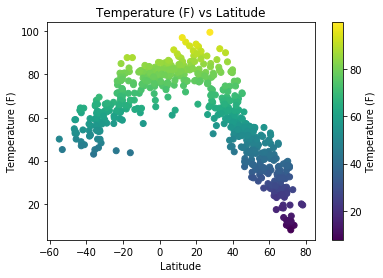

In [11]:
temperature = cities_df['Temperature']
latitude = cities_df['Latitude'];
colors = list(cities_df['Temperature'])
plt.scatter(latitude, temperature, c=colors)
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
clb = plt.colorbar()
clb.set_label('Temperature (F)')
plt.savefig('lat_vs_temp.png')
plt.show()


> We can see that temperature rises as we get closer to the center of the equator and decreases as we reach each pole.

#### Latitude vs. Humidity Plot

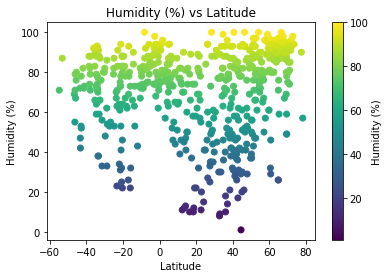

In [12]:
humidity = cities_df['Humidity']
latitude = cities_df['Latitude'];
colors = list(cities_df['Humidity'])
plt.scatter(latitude, humidity, c=colors)
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
clb = plt.colorbar()
clb.set_label('Humidity (%)')
plt.savefig('lat_vs_humid.png')
plt.show()


> Humidity is not dependant of the latitude. We should check for other factors.

#### Latitude vs. Cloudiness Plot

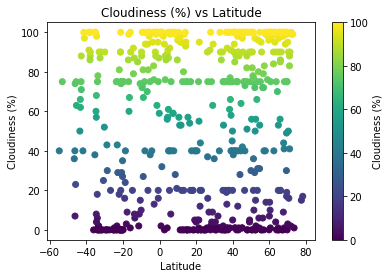

In [13]:
cloudiness = cities_df['Cloudiness']
latitude = cities_df['Latitude'];
colors = list(cities_df['Cloudiness'])
plt.scatter(latitude, cloudiness, c=colors)
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
clb = plt.colorbar()
clb.set_label('Cloudiness (%)')
plt.savefig('lat_vs_cloudy.png')
plt.show()


> There is no relation between cloudiness and latitude, as each latitude can have different cloudiness.

#### Latitude vs. Wind Speed Plot

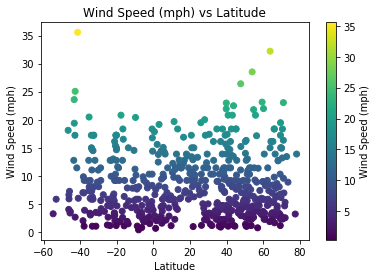

In [14]:
wind_speed = cities_df['Wind Speed']
latitude = cities_df['Latitude'];
colors = list(cities_df['Wind Speed'])
plt.scatter(latitude, wind_speed, c=colors)
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
clb = plt.colorbar()
clb.set_label('Wind Speed (mph)')
plt.savefig('lat_vs_wind_spd.png')
plt.show()


> The wind speed in our sample is pointing that a los of cities have weak wind speed values.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearRegressionPlot(x_values, y_values, xlabel: str, ylabel: str):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
    regress_values = x_values*slope + intercept
    colors = list(y_values)
    line_eq = f'y = {str(round(slope,2))} + x + {str(round(intercept,2))}'
    plt.scatter(x_values, y_values, c=colors)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()), fontsize=15,color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs. {xlabel}')
    clb = plt.colorbar()
    clb.set_label(ylabel)
    return plt;


In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = cities_df[cities_df['Latitude'] >= 0]
northern_hemisphere_df = northern_hemisphere_df.sort_values(by='Latitude')
southern_hemisphere_df = cities_df[cities_df['Latitude'] < 0]
southern_hemisphere_df = southern_hemisphere_df.sort_values(by='Latitude')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

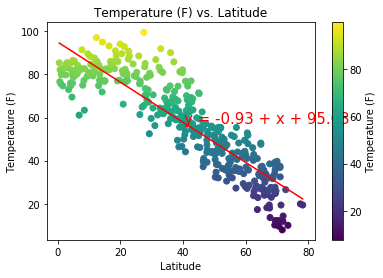

In [17]:
northern_temperature = northern_hemisphere_df['Temperature']
northern_latitude = northern_hemisphere_df['Latitude']

plt = linearRegressionPlot(northern_latitude, northern_temperature, 'Latitude', 'Temperature (F)')
plt.savefig('northern_lat_vs_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

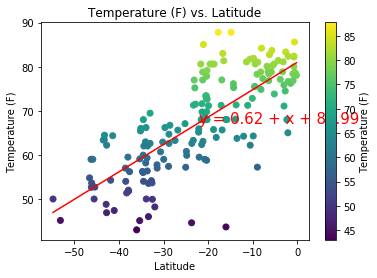

In [18]:
southern_temperature = southern_hemisphere_df['Temperature']
southern_latitude = southern_hemisphere_df['Latitude']

plt = linearRegressionPlot(southern_latitude, southern_temperature, 'Latitude', 'Temperature (F)')
plt.savefig('southern_lat_vs_temp.png')
plt.show()

> Plot one shows a negative strong correlation because the northern hemisphere gets colder as we reach the northern pole.
> Plot two shows a positive strong correlation that increases temperature as we get closer to the meridian of greenwich 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

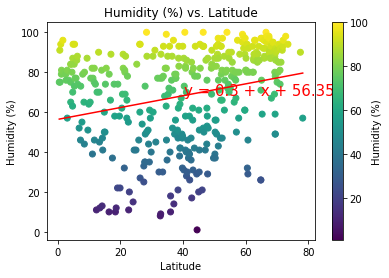

In [19]:
northern_humidity = northern_hemisphere_df['Humidity']
northern_latitude = northern_hemisphere_df['Latitude']

plt = linearRegressionPlot(northern_latitude, northern_humidity, 'Latitude', 'Humidity (%)')
plt.savefig('northern_lat_vs_humid.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

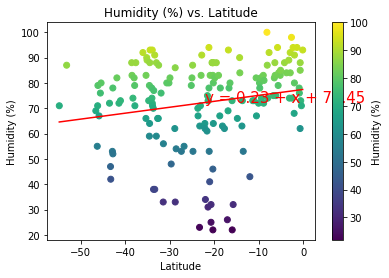

In [20]:
southern_humidity = southern_hemisphere_df['Humidity']
southern_latitude = southern_hemisphere_df['Latitude']

plt = linearRegressionPlot(southern_latitude, southern_humidity, 'Latitude', 'Humidity (%)')
plt.savefig('southern_lat_vs_humid.png')
plt.show()

> Plot one is similar to plot two as both have a near 0 value pearson coefficient which further proves that neither hemisphere latitude influences humidity.
> We got a sample where a lot of northern hemisphere cities have more humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

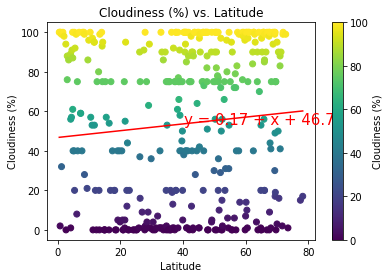

In [21]:
northern_cloudiness = northern_hemisphere_df['Cloudiness']
northern_latitude = northern_hemisphere_df['Latitude']

plt = linearRegressionPlot(northern_latitude, northern_cloudiness, 'Latitude', 'Cloudiness (%)')
plt.savefig('northern_lat_vs_cloudy.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

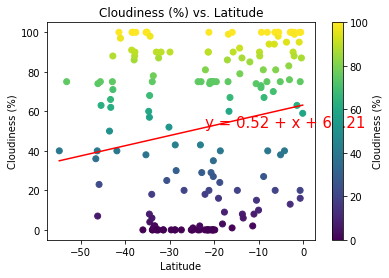

In [22]:
southern_cloudiness = southern_hemisphere_df['Cloudiness']
southern_latitude = southern_hemisphere_df['Latitude']

plt = linearRegressionPlot(southern_latitude, southern_cloudiness, 'Latitude', 'Cloudiness (%)')
plt.savefig('southern_lat_vs_cloudy.png')
plt.show()

> Both plots show no real correlation between cloudiness and latitude, but again as we can see and relate to the humidity plots we have more cloudy cities in our sample.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

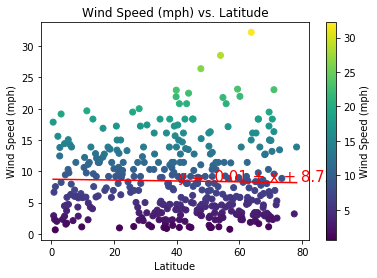

In [23]:
northern_wind_speed = northern_hemisphere_df['Wind Speed']
northern_latitude = northern_hemisphere_df['Latitude']

plt = linearRegressionPlot(northern_latitude, northern_wind_speed, 'Latitude', 'Wind Speed (mph)')
plt.savefig('northern_lat_vs_wind_spd.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

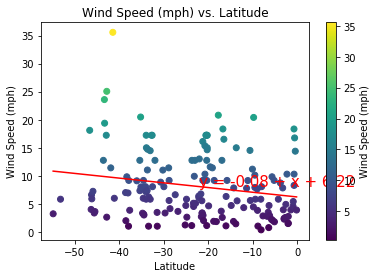

In [24]:
southern_wind_speed = southern_hemisphere_df['Wind Speed']
southern_latitude = southern_hemisphere_df['Latitude']

plt = linearRegressionPlot(southern_latitude, southern_wind_speed, 'Latitude', 'Wind Speed (mph)')
plt.savefig('southern_lat_vs_wind_spd.png')
plt.show()

> Both plots prove and have similar weak correlations between wind speed and latitude but the northern hemisphere has more cities with weaker wind speeds, which means that clouds don't move as much and as a consequence are mor humid cities. 